In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import messagebox
from tkinter import *
from tkinter.filedialog import askopenfilename
from tkinter import simpledialog
import tkinter
import numpy as np
from tkinter import filedialog
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn_extensions.extreme_learning_machines.elm import GenELMClassifier
from sklearn_extensions.extreme_learning_machines.random_layer import RBFRandomLayer, MLPRandomLayer
from keras.models import Sequential
from keras.layers import Dense
import os
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix

C:\Users\ANUPRIYA B\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass neg_label=-1, pos_label=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [2]:
df=pd.read_csv("heart.csv")
df.head()
df.info()
df.corr().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


C:\Users\ANUPRIYA B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


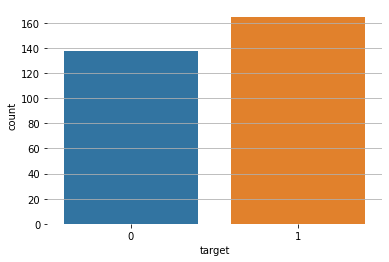

In [3]:
ax = sns.countplot(df['target'])

ax.yaxis.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
plt.show()


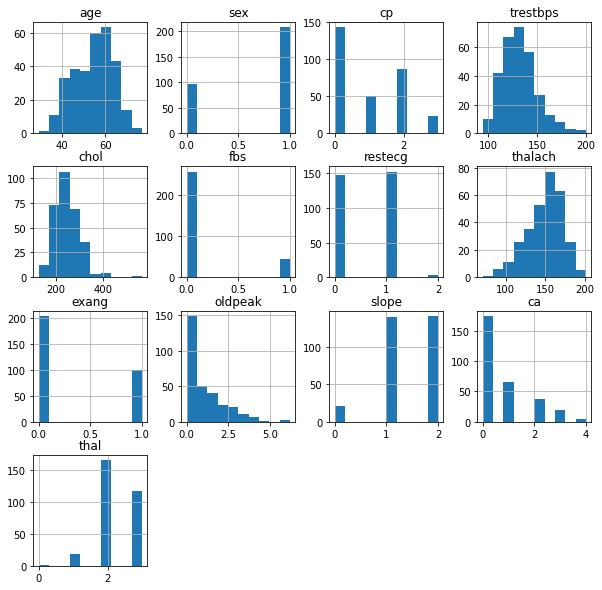

In [4]:
df_1 = df.drop('target', axis=1, inplace=False)
ax = df_1.hist(figsize = (10,10))
plt.show()


In [5]:
main = tkinter.Tk()
main.title("Heart Disease Prediction using Machine Learning and Deep Learning Algorithms")
main.geometry("1300x1200")

''

In [6]:
global filename
global svm_acc,svm_precision,svm_recall,lr_acc,lr_precision,lr_recall,ann_acc,ann_precision,ann_recall,elm_acc,elm_precision,elm_recall
global data
global X, Y, X_train, X_test, y_train, y_test

In [7]:
def upload():
    global filename
    global data
    filename = filedialog.askopenfilename()
    pathlabel.config(text=filename)
    data = pd.read_csv(filename)
    text.delete('1.0', END)
    text.insert(END,'Heart disease dataset loaded\n')
    text.insert(END,"Dataset Size : "+str(len(data))+"\n")

In [8]:
def standardize(X_train, X_test):
    stdScale = StandardScaler().fit(X_train)
    X_train = stdScale.transform(X_train)
    X_test = stdScale.transform(X_test)

    pca = PCA(n_components=0.99).fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

    scale = np.append(X_train, X_test, axis=0)
    minmaxScale = MinMaxScaler((-1, 1)).fit(scale)
    X_train = minmaxScale.transform(X_train)
    X_test = minmaxScale.transform(X_test)
    
    return X_train,X_test

In [9]:
def splitdataset(data): 
    X = data.values[:, 0:13] 
    Y = data.values[:, 13]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)
    X_train, X_test = standardize(X_train, X_test)
    return X, Y, X_train, X_test, y_train, y_test

In [10]:
def preprocess():
    global X, Y, X_train, X_test, y_train, y_test
    global data
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    text.delete('1.0', END)
    text.insert(END,"Training model generated\n\n")
    text.insert(END,"Dataset Size After Preprocessing : "+str(len(data))+"\n\n")

    text.insert(END,"Splitted Training Size : "+str(len(X_train))+"\n")
    text.insert(END,"Splitted Test Size     : "+str(len(X_test))+"\n")

In [11]:
def prediction(X_test, cls): 
    y_pred = cls.predict(X_test) 
    return y_pred 

In [12]:
def cal_accuracy(y_test, y_pred, details): 
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred)*100
    CR = classification_report(y_test, y_pred)
    text.insert(END,details+"\n\n")
    text.insert(END,"Report : "+str(CR)+"\n")
    text.insert(END,"Confusion Matrix: \n"+str(cm)+"\n\n")  
    return accuracy 

In [13]:
def SVM():
    global svm_acc,svm_precision,svm_recall
    global X, Y, X_train, X_test, y_train, y_test
    text.delete('1.0', END)
    cls = svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 2) 
    cls.fit(X_train, y_train) 
    prediction_data = prediction(X_test, cls) 
    svm_acc = cal_accuracy(y_test, prediction_data,'SVM Accuracy, Classification Report & Confusion Matrix')
    svm_precision = round(precision_score(y_test, prediction_data,average='macro') * 100, 2)
    svm_recall = round(recall_score(y_test, prediction_data,average='macro') * 100,2)
    text.insert(END,"SVM Accuracy : "+str(svm_acc)+"\n\n")
    text.insert(END,"SVM Precision : "+str(svm_precision)+"\n\n")
    text.insert(END,"SVM Recall : "+str(svm_recall)+"\n\n")

In [14]:
def logisticRegression():
    global lr_acc,lr_precision,lr_recall
    global X, Y, X_train, X_test, y_train, y_test
    text.delete('1.0', END)
    cls = LogisticRegression(penalty='l2', dual=False, tol=0.002, C=2.0, solver ='saga')
    cls.fit(X_train, y_train)
    prediction_data = prediction(X_test, cls) 
    lr_acc = cal_accuracy(y_test, prediction_data,'Logistic Regression Accuracy, Classification Report & Confusion Matrix')
    lr_precision = round(precision_score(y_test, prediction_data,average='macro') * 100,2)
    lr_recall = round(recall_score(y_test, prediction_data,average='macro') * 100,2)
    text.insert(END,"Logistic Regression Accuracy : "+str(lr_acc)+"\n\n")
    text.insert(END,"Logistic Regression Precision : "+str(lr_precision)+"\n\n")
    text.insert(END,"Logistic Regression Recall : "+str(lr_recall)+"\n\n")

In [15]:
def ANN():
    global ann_acc,ann_precision,ann_recall
    global X, Y, X_train, X_test, y_train, y_test
    text.delete('1.0', END)
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=64)
    prediction_data = model.predict_classes(X_test)
    ann_acc = cal_accuracy(y_test, prediction_data, 'Artificial Neural Network Accuracy, Classification Report & Confusion Matrix')
    ann_precision = round(precision_score(y_test, prediction_data,average='macro') * 100,2)
    ann_recall = round(recall_score(y_test, prediction_data,average='macro') * 100,2)
    text.insert(END,"Artificial Neural Network Accuracy : "+str(ann_acc)+"\n\n")
    text.insert(END,"Artificial Neural Network Precision : "+str(ann_precision)+"\n\n")
    text.insert(END,"Artificial Neural Network Recall : "+str(ann_recall)+"\n\n")

In [16]:
def ELM():
    global elm_acc,elm_precision,elm_recall
    global X, Y, X_train, X_test, y_train, y_test
    text.delete('1.0', END)
    log_reg = LogisticRegression(class_weight='balanced')
    srhl_tanh = MLPRandomLayer(n_hidden=1500, activation_func='tanh')
    cls = GenELMClassifier(hidden_layer=srhl_tanh,regressor=log_reg)
    cls.fit(X_train, y_train)
    prediction_data = prediction(X_test, cls) 
    elm_acc = cal_accuracy(y_test, prediction_data,'Extreme Learning Machine Algorithm Accuracy, Classification Report & Confusion Matrix')
    elm_precision = round(precision_score(y_test, prediction_data,average='macro') * 100,2)
    elm_recall = round(recall_score(y_test, prediction_data,average='macro') * 100,2)
    text.insert(END,"Extreme Learning Machine Accuracy : "+str(elm_acc)+"\n\n")
    text.insert(END,"Extreme Learning Machine Precision : "+str(elm_precision)+"\n\n")
    text.insert(END,"Extreme Learning Machine Recall : "+str(elm_recall)+"\n\n")

In [17]:
def graph():
    height = [svm_acc,svm_precision,svm_recall,lr_acc,lr_precision,lr_recall,ann_acc,ann_precision,ann_recall,elm_acc,elm_precision,elm_recall]
    bars = ('SVM Accuracy','SVM Precision','SVM Recall','LR Accuracy','LR Precision','LR Recall','ANN Accuracy','ANN Precision','ANN Recall','ELM Accuracy','ELM Precision','ELM Recall')
    y_pos = np.arange(len(bars))
    plt.figure(figsize=(20, 5))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.show()
    
    x1=['Accuracy','Precision','Recall']
    y1=[svm_acc,svm_precision,svm_recall]
    plt.plot(x1,y1,label='SVM')
    y2=[lr_acc,lr_precision,lr_recall]
    plt.plot(x1,y2,label='Logistic Regression')
    y3=[ann_acc,ann_precision,ann_recall]
    plt.plot(x1,y3,label='ANN')
    y4=[elm_acc,elm_precision,elm_recall]
    plt.plot(x1,y4,label='ELM')
    plt.ylim([80, 90])
    plt.legend()
    plt.show()

In [18]:
font = ('times', 16, 'bold')
title = Label(main, text='Heart Disease Prediction using Machine Learning and Deep Learning Algorithms')
title.config(bg='PaleGreen2', fg='Khaki4')  
title.config(font=font)           
title.config(height=3, width=120)       
title.place(x=0,y=5)

font1 = ('times', 14, 'bold')
upload = Button(main, text="Upload Heart Disease Dataset", command=upload)
upload.place(x=700,y=100)
upload.config(font=font1)  

pathlabel = Label(main)
pathlabel.config(bg='DarkOrange1', fg='white')  
pathlabel.config(font=font1)           
pathlabel.place(x=700,y=150)

preprocessButton = Button(main, text="Preprocess Dataset", command=preprocess)
preprocessButton.place(x=700,y=200)
preprocessButton.config(font=font1) 

svmButton = Button(main, text="Run SVM Algorithm", command=SVM)
svmButton.place(x=700,y=250)
svmButton.config(font=font1) 


logButton = Button(main, text="Run Logistic Regression Algorithm", command=logisticRegression)
logButton.place(x=700,y=300)
logButton.config(font=font1)

annButton = Button(main, text="Run Artificial Neural Network Algorithm", command=ANN)
annButton.place(x=700,y=350)
annButton.config(font=font1)

emlButton = Button(main, text="Run Extreme Learning Machine Algorithm", command=ELM)
emlButton.place(x=700,y=400)
emlButton.config(font=font1)

graphButton = Button(main, text="Accuracy Graph", command=graph)
graphButton.place(x=700,y=450)
graphButton.config(font=font1)

font1 = ('times', 12, 'bold')
text=Text(main,height=30,width=80)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=10,y=100)
text.config(font=font1)

Epoch 1/100
4/4 [==============================] - 20s 4ms/step - loss: 0.7032 - accuracy: 0.4536
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4535
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.5035
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5185
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6817 - accuracy: 0.5474
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.6098
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.6093
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.6731
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.7245
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.7226
Epoch 11/100
4/4 [==========

4/4 [==============================] - 0s 3ms/step - loss: 0.3246 - accuracy: 0.8775
Epoch 85/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8869
Epoch 86/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3103 - accuracy: 0.8879
Epoch 87/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8922
Epoch 88/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8891
Epoch 89/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3085 - accuracy: 0.8884
Epoch 90/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.8895
Epoch 91/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8926
Epoch 92/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3063 - accuracy: 0.8807
Epoch 93/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.8896
Epoch 94/100
4/4 [===============

C:\Users\ANUPRIYA B\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\ANUPRIYA B\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ANUPRIYA B\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LI

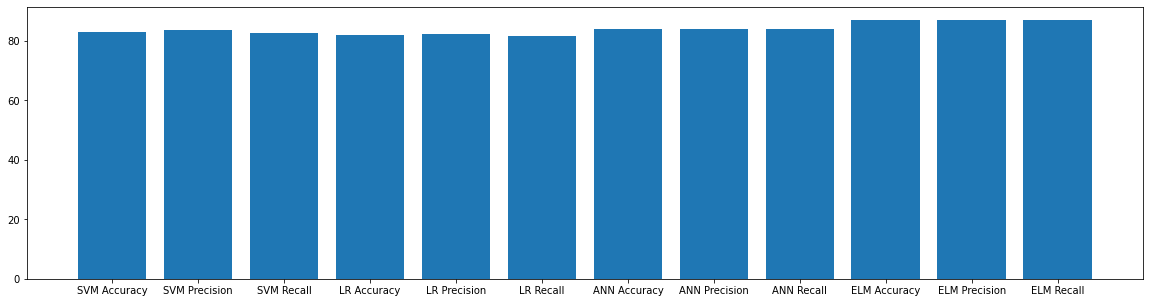

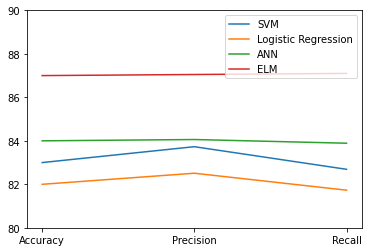

In [ ]:
main.config(bg='PeachPuff2')
main.mainloop()